# Data Munging

In [1]:
# Importing libraries 
import numpy as np 
import pandas as pd
#import janitor

# !pip3 install pyjanitor # run this once

import sklearn 
from sklearn.impute import KNNImputer
from sklearn import preprocessing

KeyboardInterrupt: 

In [ ]:
import seaborn as sns 
import matplotlib.pyplot as plt 

In [2]:
data = pd.read_csv('../data/mushrooms.csv')

In [3]:
data.info() # We want to see the data types and how many null values do we have in the dataset.  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [4]:
data.columns # We want to clean column names automatically by replacing each - with _

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [5]:
data = data.clean_names()

In [6]:
data.columns # Check column names after automatic cleaning

Index(['class', 'cap_shape', 'cap_surface', 'cap_color', 'bruises', 'odor',
       'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color',
       'stalk_shape', 'stalk_root', 'stalk_surface_above_ring',
       'stalk_surface_below_ring', 'stalk_color_above_ring',
       'stalk_color_below_ring', 'veil_type', 'veil_color', 'ring_number',
       'ring_type', 'spore_print_color', 'population', 'habitat'],
      dtype='object')

In [7]:
data.describe()

,class,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [5]:
# We want to see what different values each column contains
# From here, we can see that the veil_type has one single value and therefore is redundant and not informative so we can proceed with dropping it 
data.columns.tolist()
for col in data.columns.tolist(): 
    print(col,':  ',data[col].unique())

class :   ['p' 'e']
cap-shape :   ['x' 'b' 's' 'f' 'k' 'c']
cap-surface :   ['s' 'y' 'f' 'g']
cap-color :   ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
bruises :   ['t' 'f']
odor :   ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
gill-attachment :   ['f' 'a']
gill-spacing :   ['c' 'w']
gill-size :   ['n' 'b']
gill-color :   ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
stalk-shape :   ['e' 't']
stalk-root :   ['e' 'c' 'b' 'r' '?']
stalk-surface-above-ring :   ['s' 'f' 'k' 'y']
stalk-surface-below-ring :   ['s' 'f' 'y' 'k']
stalk-color-above-ring :   ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
stalk-color-below-ring :   ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
veil-type :   ['p']
veil-color :   ['w' 'n' 'o' 'y']
ring-number :   ['o' 't' 'n']
ring-type :   ['p' 'e' 'l' 'f' 'n']
spore-print-color :   ['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']
population :   ['s' 'n' 'a' 'v' 'y' 'c']
habitat :   ['u' 'g' 'm' 'd' 'p' 'w' 'l']


In [9]:
data.drop('veil_type', axis = 1, inplace = True)

In [10]:
# We can see that columns have multiple repetitive values (letters), even though they mean different things in each column. 
# This might cause some problems like duplications when we create dummy variables for these categorical values. 

# We can also see that the column 'stalk_root' has a non-alphanumeric value and it might need some munging. 
# According to the dataset's documentation, the value '?' in stalk_root means that they are missing or unknown stalk root data. 
# Let's see how many of these missing values we have to decide if it'd be okay to drop these rows. 

vals = data['stalk_root'].value_counts().index.values.tolist()

NA_count = data['stalk_root'].value_counts().values

NA_frac = data['stalk_root'].value_counts().to_list()
NA_frac = [i/sum(NA_frac) for i in NA_frac]

pd.DataFrame(zip(NA_count,NA_frac), columns=['Count','Fraction'], index= vals)

# So, now we can see that if we drop the missing values in this column we're losing 30% of our data which accounts for about 2500 instances. 
# Dropping the rows is not the best solution in this case. 
# Therefore, we'll try to impute using KNN.
# Before that, the categorical value must be numerically encoded/labelled from 0 to n. 


# ['population', 'cap_shape', 'stalk_shape', 'stalk_surface_above_ring', 'stalk_surface_below_ring', 'stalk_color_below_ring']

,Count,Fraction
b,3776,0.464796
?,2480,0.305268
e,1120,0.137863
c,556,0.068439
r,192,0.023634


In [4]:
# Let's see the order of values in this column
data.stalk_root.unique()

AttributeError: 'DataFrame' object has no attribute 'stalk'

In [6]:
le = preprocessing.LabelEncoder()

for i in data.columns.tolist():
    data[i]= le.fit_transform(data[i])

data

NameError: name 'preprocessing' is not defined

In [13]:
# Order of values after encoding 
data['stalk_root'].unique()

array([3, 2, 1, 4, 0])

In [14]:
# But, for the models to impute the missing data, we should replace each 4 with a NaN. 
data.replace({'stalk_root': {0: np.nan}}).stalk_root.value_counts()

1.0    3776
3.0    1120
2.0     556
4.0     192
Name: stalk_root, dtype: int64

In [15]:
imputer = KNNImputer(missing_values = np.nan, n_neighbors=5, weights = 'distance')
imputer.fit_transform(data[['stalk_root']])

array([[3.],
       [2.],
       [2.],
       ...,
       [0.],
       [0.],
       [0.]])

In [16]:
data.stalk_root.value_counts()

1    3776
0    2480
3    1120
2     556
4     192
Name: stalk_root, dtype: int64

In [17]:
# We can see that KNNImputer didn't give us any useful results and we're again back on square 1. Therefore, we'll just drop the column. 
data.drop('stalk_root', axis= 1, inplace= True)

In [ ]:
data.to_csv('../data/mushroom_clean.csv') 

In [ ]:
data = pd.read_csv('../data/mushroom_clean.csv')

: 

# DataViz

In [ ]:
# Descriptive Statistics
# Visualizations
plt.figure(figsize=(15,5))
sns.countplot(x = 'veil-color' , hue = 'class' , data = data )
plt.title('Veil Color by the Class')
plt.xlabel('Veil Color')
plt.ylabel('No. Of Mushroom');

From the graph, we can see that the Veil Color can be used to know the class of the mushroom except when the color is white 

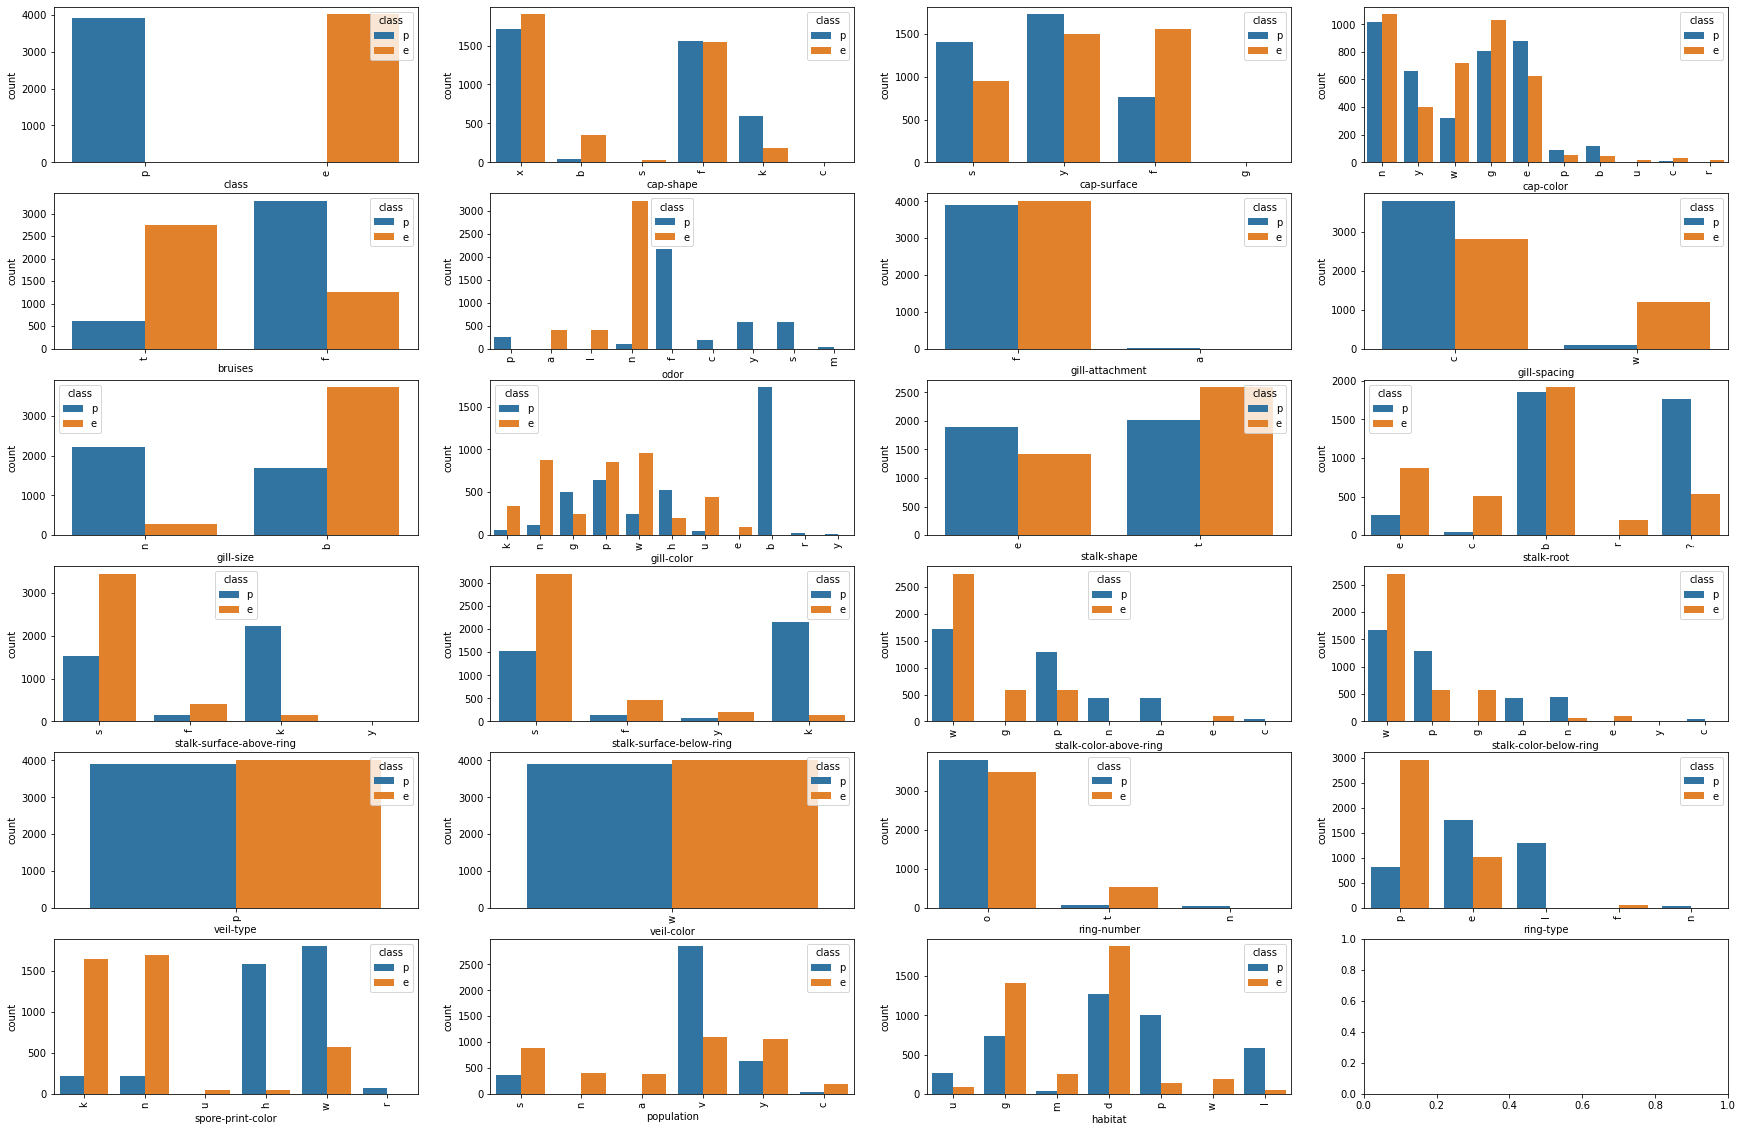

In [ ]:
ndf = data.loc[data['veil-color'] == 'w'] 
fig, ax = plt.subplots(6, 4, figsize=(30, 20))
for variable, subplot in zip(ndf.columns.tolist(), ax.flatten()):
    sns.countplot(x = variable, hue = 'class' ,  data = ndf,  ax=subplot)
    for label in subplot.get_xticklabels():
        plt.ylabel('No. of White Color Mushrooms');
        label.set_rotation(90);

We did more analysis to know if there is a feature that can be used to know the class if the color is white. We noticed that the possible features are the smell & population & Stalk Color & Ring Type

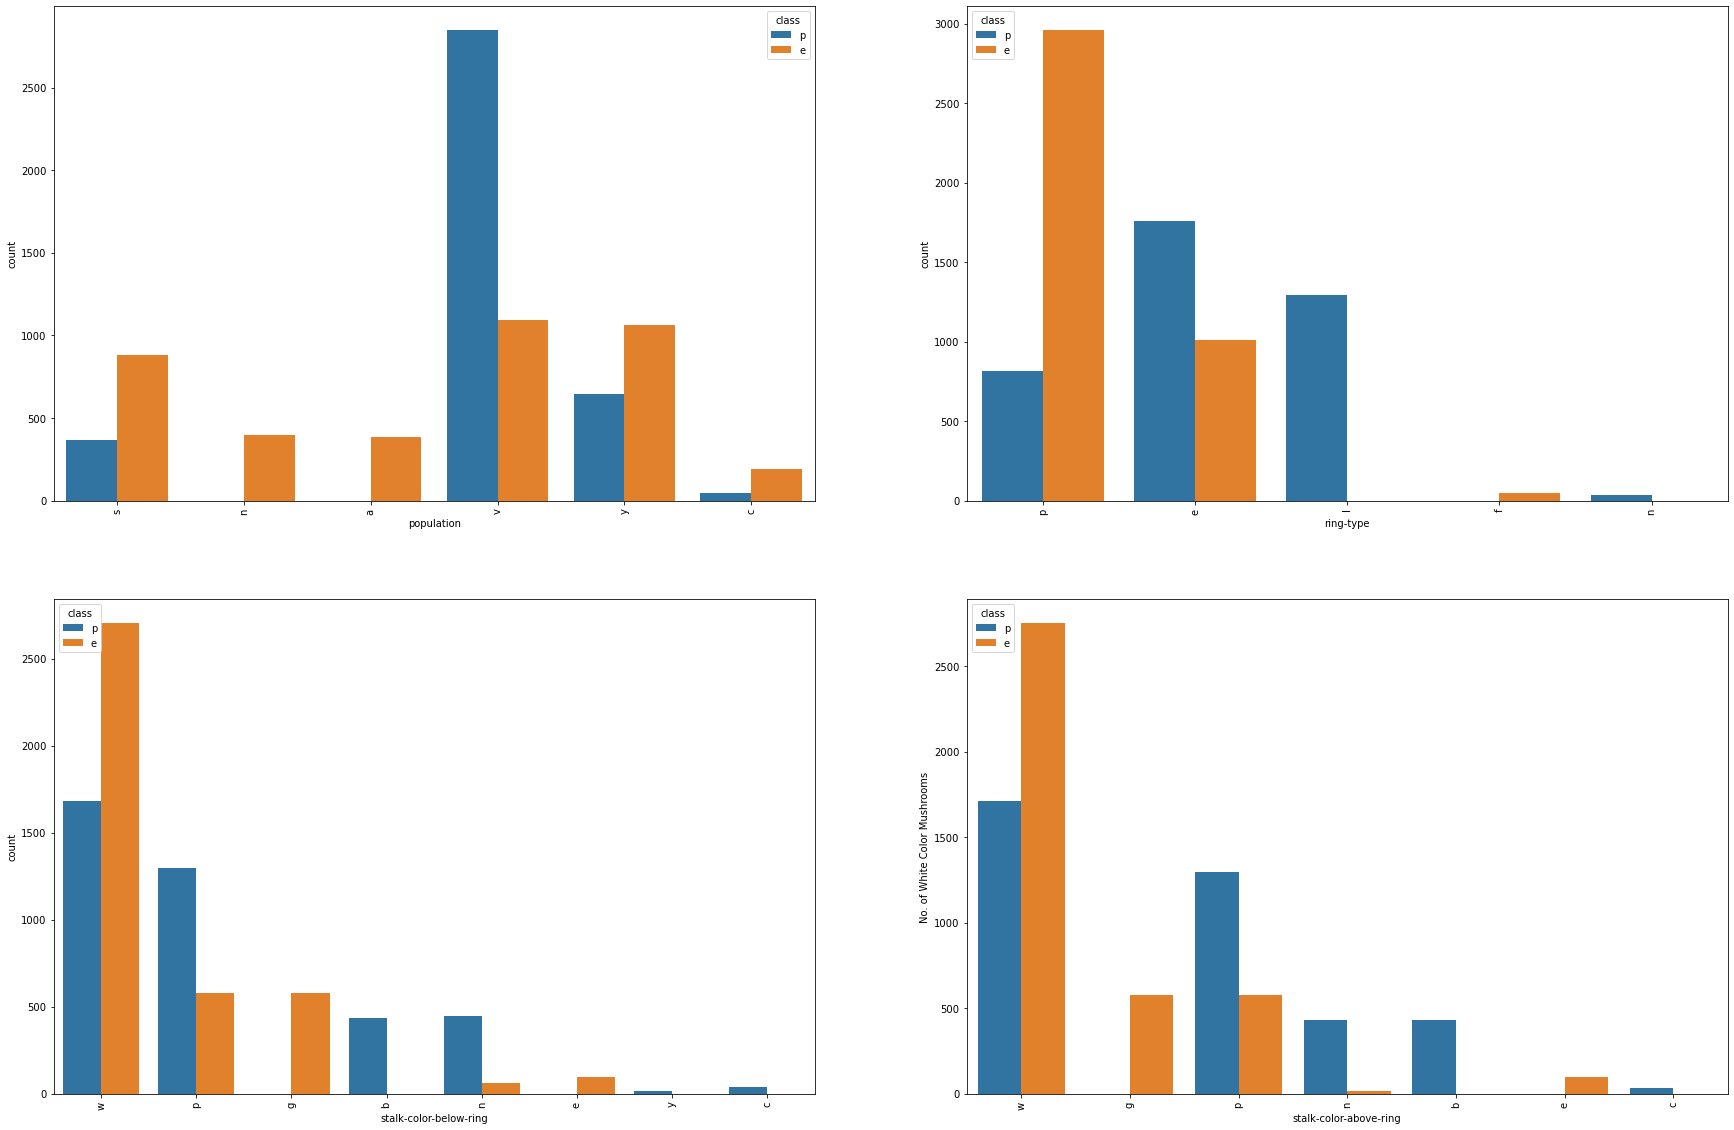

In [ ]:
selected_rows = ['population','ring-type','stalk-color-below-ring','stalk-color-above-ring']
# plt.figure(figsize=(15,5))
# sns.countplot(x = 'odor' , hue = 'class' , data = ndf )
# plt.title('White Color Veil vs Smell')
# plt.xlabel('Veil Color')
# plt.ylabel('No. Of Mushroom');
fig, ax = plt.subplots(2, 2, figsize=(30, 20))
for variable, subplot in zip(selected_rows, ax.flatten()):
    sns.countplot(x = variable, hue = 'class' ,  data = ndf,  ax=subplot)
    for label in subplot.get_xticklabels():
        plt.ylabel('No. of White Color Mushrooms');
        label.set_rotation(90);


# Dimensionality Reduction

In [ ]:
# PCA

# Model Development

In [ ]:
# Model dev